# <center> Déterminer si un mail est un spam

# 1. Introduction

In [19]:
import warnings

warnings.filterwarnings("ignore")

## 1.1 Les librairies python utilisées dans notre programme

In [20]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [23]:
!pip install keras

<IPython.core.display.Javascript object>

In [24]:
!pip install scikeras

<IPython.core.display.Javascript object>

In [25]:
#base
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns


# sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Transformateurs de variables
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [26]:
import matplotlib

print("matplotlib: {}".format(matplotlib.__version__))
print("numpy: {}".format(np.__version__))
print("pandas: {}".format(pd.__version__))
print("seaborn: {}".format(sns.__version__))

matplotlib: 3.7.1
numpy: 1.24.3
pandas: 1.5.3
seaborn: 0.12.2


<IPython.core.display.Javascript object>

## 1.2 Les fichiers des données contenus dans le dossier

In [27]:
# Affecter une variable avec le chemin vers le dossier
path = "C:/Users/maimo/Documents/spam/"
os.listdir(path)  # methode affichant tous les fichiers contenus dans notre dossier

['.ipynb_checkpoints',
 'determiner mail spam-Copy1.ipynb',
 'determiner mail spam.ipynb',
 'emails.csv']

<IPython.core.display.Javascript object>

# 2. Data

## 2.1 Présentation du data

In [28]:
spam = pd.read_csv(path + "emails.csv")

<IPython.core.display.Javascript object>

In [29]:
spam.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [30]:
print(f"shape : {spam.shape}")
print(f"le nombre de lignes est : {spam.shape[0]}")
print(f"le nombre de colonnes est : {spam.shape[1]}")

shape : (5172, 3002)
le nombre de lignes est : 5172
le nombre de colonnes est : 3002


<IPython.core.display.Javascript object>

* **Email No :** nom a été défini avec des chiffres et non avec le nom du destinataire pour protéger la confidentialité
* **prédiction :**  1 pour spam, 0 pour non spam
* **Les 3 000 colonnes restantes :** correspondent aux 3 000 mots les plus courants dans tous les e-mails, après exclusion des caractères/mots non alphabétiquesuleuse (1) ou non (0)

In [31]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


<IPython.core.display.Javascript object>

## 2.2 Colonnes numériques

In [32]:
cols_num_tot = spam.select_dtypes(include=np.number).columns  # les colonnes numériques
cols_num_tot

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3001)

<IPython.core.display.Javascript object>

Nous avons ainsi toutes les colonnes numérique affichées ci-dessus.

In [33]:
print(f"il y a {len(cols_num_tot)} colonnes numériques")

il y a 3001 colonnes numériques


<IPython.core.display.Javascript object>

## 2.3  spam[ 'Prediction' ]

In [34]:
spam["Prediction"].describe()

count    5172.000000
mean        0.290023
std         0.453817
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Prediction, dtype: float64

<IPython.core.display.Javascript object>

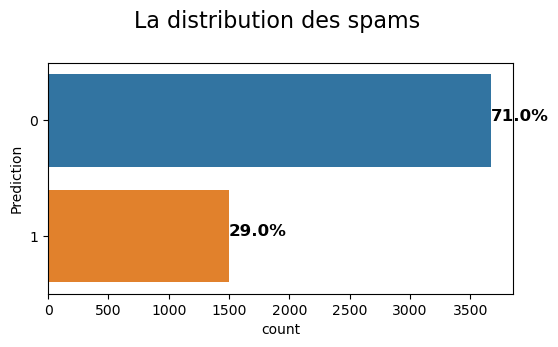

<IPython.core.display.Javascript object>

In [35]:
ax, fig = plt.subplots(figsize=(6, 3))
ax = sns.countplot(y="Prediction", data=spam)
ax.set_title("La distribution des spams \n", fontsize=16)

for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_width() / len(spam.Prediction))
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), fontsize=12, fontweight="bold")

Les spams représentent 29% des emails de notre data

# 3. Target et features

## 3.1 Taget :  spam["Prediction"]

Dans ce notebook la valeur à prédire, nommée target, est 'TotalGHGEmissions'.

In [36]:
y = spam["Prediction"]  # target
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

<IPython.core.display.Javascript object>

 ## 3.2 Features

Feactures correspondent aux variables permettant de prédire le target.

In [49]:
X = spam.iloc[:, 1:3001].values
X

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 8, 13, 24, ...,  0,  1,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 2,  7,  1, ...,  0,  1,  0],
       [22, 24,  5, ...,  0,  0,  0]], dtype=int64)

<IPython.core.display.Javascript object>

# 4. Différentes variables X_train, X_test, Y_train, Y_test

Nous devons séparer les variables d'apprentissage de celles du test

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(
    "Entrainement: {} lignes,\nTest: {} lignes.\n".format(
        X_train.shape[0], X_test.shape[0]
    )
)

Entrainement: 4137 lignes,
Test: 1035 lignes.



<IPython.core.display.Javascript object>

In [51]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<IPython.core.display.Javascript object>

# 5. ANN Sans GridSearch

In [131]:
ann = tf.keras.models.Sequential

<IPython.core.display.Javascript object>

## 5.1 Initialisation

In [132]:
ann = tf.keras.models.Sequential()

<IPython.core.display.Javascript object>

In [133]:
ann.add(tf.keras.layers.Dense(units=64, activation="relu", input_dim=3000))
ann.add(tf.keras.layers.Dropout(rate=0.1))

<IPython.core.display.Javascript object>

## 5.2 les couches cachées

In [134]:
ann.add(tf.keras.layers.Dense(units=64, activation="relu"))  # 2e couche
ann.add(tf.keras.layers.Dropout(rate=0.1))

<IPython.core.display.Javascript object>

In [135]:
ann.add(tf.keras.layers.Dense(units=64, activation="relu"))  # 3e couche
ann.add(tf.keras.layers.Dropout(rate=0.1))

<IPython.core.display.Javascript object>

## 5.3 Dernière couche

In [136]:
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

<IPython.core.display.Javascript object>

## 5.4 Compiler

In [137]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [138]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
130/130 [==============================] - 5s 9ms/step - loss: 0.2264 - accuracy: 0.8980
Epoch 2/100
130/130 [==============================] - 1s 10ms/step - loss: 0.0383 - accuracy: 0.9872
Epoch 3/100
130/130 [==============================] - 1s 10ms/step - loss: 0.0310 - accuracy: 0.9867
Epoch 4/100
130/130 [==============================] - 1s 10ms/step - loss: 0.0232 - accuracy: 0.9898
Epoch 5/100
130/130 [==============================] - 1s 10ms/step - loss: 0.0107 - accuracy: 0.9961
Epoch 6/100
130/130 [==============================] - 1s 10ms/step - loss: 0.0137 - accuracy: 0.9942
Epoch 7/100
130/130 [==============================] - 1s 9ms/step - loss: 0.0417 - accuracy: 0.9894
Epoch 8/100
130/130 [==============================] - 1s 10ms/step - loss: 0.0125 - accuracy: 0.9949
Epoch 9/100
130/130 [==============================] - 1s 10ms/step - loss: 0.0109 - accuracy: 0.9954
Epoch 10/100
130/130 [==============================] - 1s 10ms/step - loss: 0.0080 

<IPython.core.display.Javascript object>

## 5.5 Prédiction et Matrice de confusion

In [159]:
from sklearn.metrics import confusion_matrix, accuracy_score

<IPython.core.display.Javascript object>

In [139]:
y_pred = ann.predict(X_test)  # prediction
y_pred = y_pred > 0.5  # classification

33/33 [==============================] - 1s 6ms/step


<IPython.core.display.Javascript object>

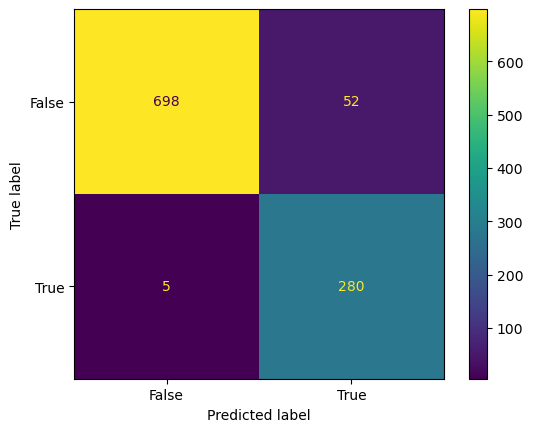

<IPython.core.display.Javascript object>

In [140]:
# Matrice de confusion
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[False, True]
)

cm_display.plot()

In [142]:
accuracy_score(y_test, y_pred)

0.9449275362318841

<IPython.core.display.Javascript object>

# 6. Améliorer l'ANN avec GirdSearchCV

## 6.1 ANN sous forme de fonction

In [143]:
def build_classifier():
    ann = tf.keras.models.Sequential()
    ann.add(
        tf.keras.layers.Dense(
            units=64, activation="relu", kernel_initializer="uniform", input_dim=3000
        )
    )
    ann.add(tf.keras.layers.Dropout(rate=0.1))
    ann.add(
        tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="uniform")
    )
    ann.add(tf.keras.layers.Dropout(rate=0.1))

    ann.add(
        tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="uniform")
    )
    ann.add(tf.keras.layers.Dropout(rate=0.1))

    ann.add(
        tf.keras.layers.Dense(
            units=1, activation="sigmoid", kernel_initializer="uniform"
        )
    )
    ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return ann

<IPython.core.display.Javascript object>

## 6.2 GridSearchCV

In [150]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

<IPython.core.display.Javascript object>

In [148]:
ann2 = KerasClassifier(model=build_classifier)  # ANN

<IPython.core.display.Javascript object>

In [151]:
params = {"batch_size": [25, 30, 35], "epochs": [50, 100, 150]}  # paramètres

<IPython.core.display.Javascript object>

In [152]:
grid_model = GridSearchCV(estimator=ann2, param_grid=params, cv=5, scoring="accuracy")

<IPython.core.display.Javascript object>

In [153]:
grid_model = grid_model.fit(X_train, y_train)

Epoch 1/50
133/133 [==============================] - 5s 10ms/step - loss: 0.2861 - accuracy: 0.8607
Epoch 2/50
133/133 [==============================] - 1s 10ms/step - loss: 0.0477 - accuracy: 0.9825
Epoch 3/50
133/133 [==============================] - 1s 10ms/step - loss: 0.0198 - accuracy: 0.9918
Epoch 4/50
133/133 [==============================] - 1s 10ms/step - loss: 0.0166 - accuracy: 0.9934
Epoch 5/50
133/133 [==============================] - 1s 10ms/step - loss: 0.0109 - accuracy: 0.9961
Epoch 6/50
133/133 [==============================] - 1s 10ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 7/50
133/133 [==============================] - 1s 10ms/step - loss: 0.0130 - accuracy: 0.9952
Epoch 8/50
133/133 [==============================] - 1s 10ms/step - loss: 0.0135 - accuracy: 0.9943
Epoch 9/50
133/133 [==============================] - 1s 9ms/step - loss: 0.0095 - accuracy: 0.9967
Epoch 10/50
133/133 [==============================] - 1s 9ms/step - loss: 0.0062 - accuracy

133/133 [==============================] - 1s 9ms/step - loss: 0.0044 - accuracy: 0.9988
Epoch 11/50
133/133 [==============================] - 1s 9ms/step - loss: 0.0052 - accuracy: 0.9982
Epoch 12/50
133/133 [==============================] - 1s 9ms/step - loss: 0.0114 - accuracy: 0.9964
Epoch 13/50
133/133 [==============================] - 1s 9ms/step - loss: 0.0135 - accuracy: 0.9973
Epoch 14/50
133/133 [==============================] - 1s 10ms/step - loss: 0.0137 - accuracy: 0.9952
Epoch 15/50
133/133 [==============================] - 1s 9ms/step - loss: 0.0092 - accuracy: 0.9967
Epoch 16/50
133/133 [==============================] - 1s 9ms/step - loss: 0.0040 - accuracy: 0.9988
Epoch 17/50
133/133 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9991
Epoch 18/50
133/133 [==============================] - 1s 9ms/step - loss: 0.0058 - accuracy: 0.9988
Epoch 19/50
133/133 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9988

133/133 [==============================] - 1s 7ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 71/100
133/133 [==============================] - 1s 8ms/step - loss: 0.0044 - accuracy: 0.9982
Epoch 72/100
133/133 [==============================] - 1s 8ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 73/100
133/133 [==============================] - 1s 8ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 74/100
133/133 [==============================] - 1s 8ms/step - loss: 0.0018 - accuracy: 0.9994
Epoch 75/100
133/133 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 0.9988
Epoch 76/100
133/133 [==============================] - 1s 8ms/step - loss: 0.0019 - accuracy: 0.9991
Epoch 77/100
133/133 [==============================] - 1s 8ms/step - loss: 0.0022 - accuracy: 0.9997
Epoch 78/100
133/133 [==============================] - 1s 8ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 79/100
133/133 [==============================] - 1s 8ms/step - loss: 0.0013 - accuracy: 

133/133 [==============================] - 1s 9ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 29/100
133/133 [==============================] - 1s 10ms/step - loss: 0.0048 - accuracy: 0.9970
Epoch 30/100
133/133 [==============================] - 1s 9ms/step - loss: 0.0053 - accuracy: 0.9991
Epoch 31/100
133/133 [==============================] - 1s 9ms/step - loss: 3.7002e-04 - accuracy: 1.0000
Epoch 32/100
133/133 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 0.9991
Epoch 33/100
133/133 [==============================] - 1s 9ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 34/100
133/133 [==============================] - 1s 9ms/step - loss: 0.0015 - accuracy: 0.9994
Epoch 35/100
133/133 [==============================] - 1s 10ms/step - loss: 0.0101 - accuracy: 0.9985
Epoch 36/100
133/133 [==============================] - 1s 9ms/step - loss: 0.0073 - accuracy: 0.9991
Epoch 37/100
133/133 [==============================] - 1s 10ms/step - loss: 0.0187 - acc

133/133 [==============================] - 1s 9ms/step - loss: 0.0040 - accuracy: 0.9991
Epoch 87/100
133/133 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9991
Epoch 88/100
133/133 [==============================] - 1s 9ms/step - loss: 0.0070 - accuracy: 0.9979
Epoch 89/100
133/133 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.9991
Epoch 90/100
133/133 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 0.9994
Epoch 91/100
133/133 [==============================] - 1s 9ms/step - loss: 0.0045 - accuracy: 0.9988
Epoch 92/100
133/133 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9991
Epoch 93/100
133/133 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.9988
Epoch 94/100
133/133 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9991
Epoch 95/100
133/133 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy

133/133 [==============================] - 1s 9ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 45/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0024 - accuracy: 0.9991
Epoch 46/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0048 - accuracy: 0.9985
Epoch 47/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0019 - accuracy: 0.9994
Epoch 48/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0020 - accuracy: 0.9994
Epoch 49/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0067 - accuracy: 0.9985
Epoch 50/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0044 - accuracy: 0.9991
Epoch 51/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 52/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0039 - accuracy: 0.9988
Epoch 53/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0037 - accuracy: 

133/133 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9997
Epoch 53/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0062 - accuracy: 0.9988
Epoch 54/150
133/133 [==============================] - 1s 10ms/step - loss: 0.0015 - accuracy: 0.9994
Epoch 55/150
133/133 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 56/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0018 - accuracy: 0.9994
Epoch 57/150
133/133 [==============================] - 1s 9ms/step - loss: 9.5353e-04 - accuracy: 0.9994
Epoch 58/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0061 - accuracy: 0.9991
Epoch 59/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9991
Epoch 60/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0050 - accuracy: 0.9991
Epoch 61/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0043 - accu

133/133 [==============================] - 1s 9ms/step - loss: 0.0043 - accuracy: 0.9994
Epoch 60/150
133/133 [==============================] - 1s 9ms/step - loss: 2.5562e-04 - accuracy: 1.0000
Epoch 61/150
133/133 [==============================] - 1s 9ms/step - loss: 3.2514e-04 - accuracy: 1.0000
Epoch 62/150
133/133 [==============================] - 1s 9ms/step - loss: 1.4547e-04 - accuracy: 1.0000
Epoch 63/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9988
Epoch 64/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0060 - accuracy: 0.9973
Epoch 65/150
133/133 [==============================] - 1s 9ms/step - loss: 7.9105e-05 - accuracy: 1.0000
Epoch 66/150
133/133 [==============================] - 1s 9ms/step - loss: 4.2000e-05 - accuracy: 1.0000
Epoch 67/150
133/133 [==============================] - 1s 9ms/step - loss: 1.3247e-05 - accuracy: 1.0000
Epoch 68/150
133/133 [==============================] - 1s 9ms/step - l

133/133 [==============================] - 1s 9ms/step - loss: 0.0016 - accuracy: 0.9994
Epoch 67/150
133/133 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9988
Epoch 68/150
133/133 [==============================] - 1s 10ms/step - loss: 9.9048e-04 - accuracy: 0.9997
Epoch 69/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9985
Epoch 70/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 71/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0017 - accuracy: 0.9991
Epoch 72/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0061 - accuracy: 0.9970
Epoch 73/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0016 - accuracy: 0.9994
Epoch 74/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 75/150
133/133 [==============================] - 1s 9ms/step - loss: 9.7039e-04 - 

133/133 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9991
Epoch 75/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 76/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 77/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 78/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0044 - accuracy: 0.9985
Epoch 79/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0042 - accuracy: 0.9988
Epoch 80/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 0.9997
Epoch 81/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0037 - accuracy: 0.9985
Epoch 82/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0138 - accuracy: 0.9979
Epoch 83/150
133/133 [==============================] - 1s 9ms/step - loss: 0.0040 - accuracy:

111/111 [==============================] - 1s 9ms/step - loss: 0.0053 - accuracy: 0.9979
Epoch 34/50
111/111 [==============================] - 1s 9ms/step - loss: 0.0093 - accuracy: 0.9973
Epoch 35/50
111/111 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9991
Epoch 36/50
111/111 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.9988
Epoch 37/50
111/111 [==============================] - 1s 9ms/step - loss: 0.0065 - accuracy: 0.9979
Epoch 38/50
111/111 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9982
Epoch 39/50
111/111 [==============================] - 1s 10ms/step - loss: 0.0074 - accuracy: 0.9991
Epoch 40/50
111/111 [==============================] - 1s 9ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 41/50
111/111 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 0.9988
Epoch 42/50
111/111 [==============================] - 1s 10ms/step - loss: 0.0159 - accuracy: 0.995

111/111 [==============================] - 1s 10ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 43/50
111/111 [==============================] - 1s 10ms/step - loss: 0.0059 - accuracy: 0.9976
Epoch 44/50
111/111 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9985
Epoch 45/50
111/111 [==============================] - 1s 10ms/step - loss: 0.0021 - accuracy: 0.9997
Epoch 46/50
111/111 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9988
Epoch 47/50
111/111 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9985
Epoch 48/50
111/111 [==============================] - 1s 10ms/step - loss: 0.0056 - accuracy: 0.9985
Epoch 49/50
111/111 [==============================] - 1s 10ms/step - loss: 0.0090 - accuracy: 0.9973
Epoch 50/50
28/28 [==============================] - 1s 5ms/step
Epoch 1/100
111/111 [==============================] - 12s 10ms/step - loss: 0.3400 - accuracy: 0.8172
Epoch 2/100
111/111 [=======

111/111 [==============================] - 1s 9ms/step - loss: 0.0057 - accuracy: 0.9982
Epoch 51/100
111/111 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 52/100
111/111 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 53/100
111/111 [==============================] - 1s 10ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 54/100
111/111 [==============================] - 1s 10ms/step - loss: 0.0149 - accuracy: 0.9988
Epoch 55/100
111/111 [==============================] - 1s 9ms/step - loss: 0.0053 - accuracy: 0.9988
Epoch 56/100
111/111 [==============================] - 1s 9ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 57/100
111/111 [==============================] - 1s 10ms/step - loss: 0.0060 - accuracy: 0.9994
Epoch 58/100
111/111 [==============================] - 1s 10ms/step - loss: 0.0022 - accuracy: 0.9997
Epoch 59/100
111/111 [==============================] - 1s 10ms/step - loss: 0.0021 - accu

111/111 [==============================] - 1s 11ms/step - loss: 0.0106 - accuracy: 0.9964
Epoch 8/100
111/111 [==============================] - 1s 13ms/step - loss: 0.0106 - accuracy: 0.9964
Epoch 9/100
111/111 [==============================] - 1s 12ms/step - loss: 0.0119 - accuracy: 0.9958
Epoch 10/100
111/111 [==============================] - 1s 10ms/step - loss: 0.0113 - accuracy: 0.9970
Epoch 11/100
111/111 [==============================] - 1s 12ms/step - loss: 0.0222 - accuracy: 0.9961
Epoch 12/100
111/111 [==============================] - 1s 10ms/step - loss: 0.0057 - accuracy: 0.9985
Epoch 13/100
111/111 [==============================] - 1s 9ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 14/100
111/111 [==============================] - 1s 10ms/step - loss: 0.0062 - accuracy: 0.9982
Epoch 15/100
111/111 [==============================] - 1s 10ms/step - loss: 0.0047 - accuracy: 0.9985
Epoch 16/100
111/111 [==============================] - 1s 10ms/step - loss: 0.0038 - acc

111/111 [==============================] - 1s 9ms/step - loss: 0.0017 - accuracy: 0.9991
Epoch 88/100
111/111 [==============================] - 1s 9ms/step - loss: 0.0022 - accuracy: 0.9991
Epoch 89/100
111/111 [==============================] - 1s 9ms/step - loss: 0.0078 - accuracy: 0.9982
Epoch 90/100
111/111 [==============================] - 1s 9ms/step - loss: 0.0059 - accuracy: 0.9985
Epoch 91/100
111/111 [==============================] - 1s 9ms/step - loss: 0.0070 - accuracy: 0.9985
Epoch 92/100
111/111 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9997
Epoch 93/100
111/111 [==============================] - 1s 9ms/step - loss: 4.9256e-04 - accuracy: 0.9997
Epoch 94/100
111/111 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9988
Epoch 95/100
111/111 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 96/100
111/111 [==============================] - 1s 9ms/step - loss: 0.0033 - accu

111/111 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9988
Epoch 46/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0042 - accuracy: 0.9988
Epoch 47/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9988
Epoch 48/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0044 - accuracy: 0.9985
Epoch 49/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0078 - accuracy: 0.9985
Epoch 50/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0073 - accuracy: 0.9982
Epoch 51/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0048 - accuracy: 0.9982
Epoch 52/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0043 - accuracy: 0.9982
Epoch 53/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0058 - accuracy: 0.9970
Epoch 54/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy

111/111 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 53/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0051 - accuracy: 0.9985
Epoch 54/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 55/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0020 - accuracy: 0.9997
Epoch 56/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 57/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0077 - accuracy: 0.9979
Epoch 58/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9991
Epoch 59/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0019 - accuracy: 0.9991
Epoch 60/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9988
Epoch 61/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0049 - accur

111/111 [==============================] - 1s 9ms/step - loss: 1.6150e-04 - accuracy: 1.0000
Epoch 60/150
111/111 [==============================] - 1s 9ms/step - loss: 5.9109e-05 - accuracy: 1.0000
Epoch 61/150
111/111 [==============================] - 1s 10ms/step - loss: 2.2714e-04 - accuracy: 1.0000
Epoch 62/150
111/111 [==============================] - 1s 10ms/step - loss: 7.1225e-05 - accuracy: 1.0000
Epoch 63/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 64/150
111/111 [==============================] - 1s 10ms/step - loss: 9.1133e-05 - accuracy: 1.0000
Epoch 65/150
111/111 [==============================] - 1s 10ms/step - loss: 6.3367e-05 - accuracy: 1.0000
Epoch 66/150
111/111 [==============================] - 1s 9ms/step - loss: 7.1837e-04 - accuracy: 0.9997
Epoch 67/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0083 - accuracy: 0.9979
Epoch 68/150
111/111 [==============================] - 1s 9ms

111/111 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 66/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9982
Epoch 67/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0054 - accuracy: 0.9982
Epoch 68/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 69/150
111/111 [==============================] - 1s 10ms/step - loss: 8.9310e-04 - accuracy: 0.9997
Epoch 70/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0071 - accuracy: 0.9976
Epoch 71/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 72/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0042 - accuracy: 0.9985
Epoch 73/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 74/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0037 

111/111 [==============================] - 1s 11ms/step - loss: 0.0016 - accuracy: 0.9994
Epoch 145/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0209 - accuracy: 0.9988
Epoch 146/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0011 - accuracy: 0.9994
Epoch 147/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 148/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 149/150
111/111 [==============================] - 1s 10ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 150/150
28/28 [==============================] - 1s 6ms/step
Epoch 1/150
111/111 [==============================] - 5s 10ms/step - loss: 0.2813 - accuracy: 0.8704
Epoch 2/150
111/111 [==============================] - 1s 12ms/step - loss: 0.0461 - accuracy: 0.9852
Epoch 3/150
111/111 [==============================] - 1s 9ms/step - loss: 0.0268 - accuracy: 0.9897
Epoch 4/150
111/111

95/95 [==============================] - 5s 9ms/step - loss: 0.3420 - accuracy: 0.8362
Epoch 2/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0512 - accuracy: 0.9804
Epoch 3/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0360 - accuracy: 0.9870
Epoch 4/50
95/95 [==============================] - 1s 9ms/step - loss: 0.0218 - accuracy: 0.9909
Epoch 5/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0204 - accuracy: 0.9921
Epoch 6/50
95/95 [==============================] - 1s 9ms/step - loss: 0.0298 - accuracy: 0.9879
Epoch 7/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0104 - accuracy: 0.9964
Epoch 8/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0070 - accuracy: 0.9976
Epoch 9/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0140 - accuracy: 0.9952
Epoch 10/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0180 - accuracy: 0.9940
Epoch 11/50
95/95 [====

95/95 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9985
Epoch 14/50
95/95 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9985
Epoch 15/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0047 - accuracy: 0.9988
Epoch 16/50
95/95 [==============================] - 1s 9ms/step - loss: 0.0057 - accuracy: 0.9982
Epoch 17/50
95/95 [==============================] - 1s 9ms/step - loss: 0.0046 - accuracy: 0.9982
Epoch 18/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0046 - accuracy: 0.9985
Epoch 19/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9991
Epoch 20/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0057 - accuracy: 0.9982
Epoch 21/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0259 - accuracy: 0.9961
Epoch 22/50
95/95 [==============================] - 1s 12ms/step - loss: 0.0116 - accuracy: 0.9967
Epoch 23/50
95/

95/95 [==============================] - 1s 10ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 76/100
95/95 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9988
Epoch 77/100
95/95 [==============================] - 1s 13ms/step - loss: 0.0084 - accuracy: 0.9967
Epoch 78/100
95/95 [==============================] - 1s 11ms/step - loss: 0.0040 - accuracy: 0.9985
Epoch 79/100
95/95 [==============================] - 1s 11ms/step - loss: 0.0023 - accuracy: 0.9988
Epoch 80/100
95/95 [==============================] - 1s 11ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 81/100
95/95 [==============================] - 1s 12ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 82/100
95/95 [==============================] - 1s 11ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 83/100
95/95 [==============================] - 1s 11ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 84/100
95/95 [==============================] - 1s 10ms/step - loss: 0.0012 - accuracy: 0.9997
Epoc

95/95 [==============================] - 1s 10ms/step - loss: 8.7833e-04 - accuracy: 0.9997
Epoch 36/100
95/95 [==============================] - 1s 10ms/step - loss: 1.5639e-04 - accuracy: 1.0000
Epoch 37/100
95/95 [==============================] - 1s 10ms/step - loss: 8.8857e-04 - accuracy: 0.9994
Epoch 38/100
95/95 [==============================] - 1s 10ms/step - loss: 2.3657e-04 - accuracy: 1.0000
Epoch 39/100
95/95 [==============================] - 1s 10ms/step - loss: 1.5671e-04 - accuracy: 1.0000
Epoch 40/100
95/95 [==============================] - 1s 10ms/step - loss: 9.3712e-05 - accuracy: 1.0000
Epoch 41/100
95/95 [==============================] - 1s 10ms/step - loss: 0.0171 - accuracy: 0.9949
Epoch 42/100
95/95 [==============================] - 1s 10ms/step - loss: 5.5387e-04 - accuracy: 1.0000
Epoch 43/100
95/95 [==============================] - 1s 9ms/step - loss: 0.0070 - accuracy: 0.9979
Epoch 44/100
95/95 [==============================] - 1s 10ms/step - loss: 0.

95/95 [==============================] - 1s 10ms/step - loss: 0.0063 - accuracy: 0.9982
Epoch 15/100
95/95 [==============================] - 1s 10ms/step - loss: 0.0251 - accuracy: 0.9952
Epoch 16/100
95/95 [==============================] - 1s 10ms/step - loss: 0.0107 - accuracy: 0.9970
Epoch 17/100
95/95 [==============================] - 1s 10ms/step - loss: 0.0098 - accuracy: 0.9967
Epoch 18/100
95/95 [==============================] - 1s 10ms/step - loss: 0.0058 - accuracy: 0.9985
Epoch 19/100
95/95 [==============================] - 1s 10ms/step - loss: 0.0060 - accuracy: 0.9979
Epoch 20/100
95/95 [==============================] - 1s 10ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 21/100
95/95 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9988
Epoch 22/100
95/95 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9991
Epoch 23/100
95/95 [==============================] - 1s 10ms/step - loss: 0.0017 - accuracy: 0.9994
Epo

95/95 [==============================] - 1s 5ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 77/100
95/95 [==============================] - 1s 5ms/step - loss: 0.0020 - accuracy: 0.9997
Epoch 78/100
95/95 [==============================] - 1s 7ms/step - loss: 0.0105 - accuracy: 0.9961
Epoch 79/100
95/95 [==============================] - 1s 6ms/step - loss: 0.0043 - accuracy: 0.9994
Epoch 80/100
95/95 [==============================] - 1s 5ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 81/100
95/95 [==============================] - 1s 6ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 82/100
95/95 [==============================] - 1s 7ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 83/100
95/95 [==============================] - 1s 8ms/step - loss: 0.0019 - accuracy: 0.9994
Epoch 84/100
95/95 [==============================] - 1s 8ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 85/100
95/95 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 86/100


95/95 [==============================] - 2s 19ms/step - loss: 0.0047 - accuracy: 0.9991
Epoch 139/150
95/95 [==============================] - 1s 7ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 140/150
95/95 [==============================] - 1s 8ms/step - loss: 5.3771e-04 - accuracy: 0.9997
Epoch 141/150
95/95 [==============================] - 1s 7ms/step - loss: 0.0015 - accuracy: 0.9991
Epoch 142/150
95/95 [==============================] - 1s 7ms/step - loss: 0.0111 - accuracy: 0.9976
Epoch 143/150
95/95 [==============================] - 1s 8ms/step - loss: 0.0028 - accuracy: 0.9988
Epoch 144/150
95/95 [==============================] - 1s 8ms/step - loss: 0.0048 - accuracy: 0.9979
Epoch 145/150
95/95 [==============================] - 1s 8ms/step - loss: 5.4681e-04 - accuracy: 0.9997
Epoch 146/150
95/95 [==============================] - 1s 7ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 147/150
95/95 [==============================] - 1s 8ms/step - loss: 8.2760e-04 - accuracy

24/24 [==============================] - 0s 2ms/step
Epoch 1/150
95/95 [==============================] - 3s 8ms/step - loss: 0.3051 - accuracy: 0.8532
Epoch 2/150
95/95 [==============================] - 1s 8ms/step - loss: 0.0457 - accuracy: 0.9828
Epoch 3/150
95/95 [==============================] - 1s 8ms/step - loss: 0.0227 - accuracy: 0.9906
Epoch 4/150
95/95 [==============================] - 1s 9ms/step - loss: 0.0159 - accuracy: 0.9946
Epoch 5/150
95/95 [==============================] - 1s 7ms/step - loss: 0.0306 - accuracy: 0.9891
Epoch 6/150
95/95 [==============================] - 1s 7ms/step - loss: 0.0098 - accuracy: 0.9958
Epoch 7/150
95/95 [==============================] - 1s 7ms/step - loss: 0.0166 - accuracy: 0.9934
Epoch 8/150
95/95 [==============================] - 1s 7ms/step - loss: 0.0083 - accuracy: 0.9976
Epoch 9/150
95/95 [==============================] - 1s 8ms/step - loss: 0.0051 - accuracy: 0.9973
Epoch 10/150
95/95 [==============================] - 1s

95/95 [==============================] - 1s 6ms/step - loss: 0.0167 - accuracy: 0.9949
Epoch 10/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0042 - accuracy: 0.9988
Epoch 11/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0151 - accuracy: 0.9988
Epoch 12/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0095 - accuracy: 0.9967
Epoch 13/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0066 - accuracy: 0.9973
Epoch 14/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0055 - accuracy: 0.9988
Epoch 15/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0140 - accuracy: 0.9973
Epoch 16/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0142 - accuracy: 0.9949
Epoch 17/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0096 - accuracy: 0.9982
Epoch 18/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0055 - accuracy: 0.9976
Epoch 19/150


95/95 [==============================] - 1s 5ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 92/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 93/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 94/150
95/95 [==============================] - 1s 5ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 95/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0018 - accuracy: 0.9991
Epoch 96/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 97/150
95/95 [==============================] - 1s 6ms/step - loss: 3.6192e-04 - accuracy: 1.0000
Epoch 98/150
95/95 [==============================] - 1s 6ms/step - loss: 8.0513e-04 - accuracy: 0.9997
Epoch 99/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0150 - accuracy: 0.9961
Epoch 100/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0018 - accuracy: 0.9994
Epoc

95/95 [==============================] - 1s 8ms/step - loss: 0.0028 - accuracy: 0.9997
Epoch 103/150
95/95 [==============================] - 1s 11ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 104/150
95/95 [==============================] - 1s 10ms/step - loss: 0.0023 - accuracy: 0.9997
Epoch 105/150
95/95 [==============================] - 1s 8ms/step - loss: 0.0018 - accuracy: 0.9991
Epoch 106/150
95/95 [==============================] - 1s 8ms/step - loss: 0.0052 - accuracy: 0.9979
Epoch 107/150
95/95 [==============================] - 1s 9ms/step - loss: 0.0019 - accuracy: 0.9994
Epoch 108/150
95/95 [==============================] - 1s 8ms/step - loss: 0.0019 - accuracy: 0.9991
Epoch 109/150
95/95 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 110/150
95/95 [==============================] - 1s 8ms/step - loss: 0.0034 - accuracy: 0.9988
Epoch 111/150
95/95 [==============================] - 1s 6ms/step - loss: 0.0022 - accuracy: 0.9997
Ep

138/138 [==============================] - 1s 6ms/step - loss: 0.0017 - accuracy: 0.9995
Epoch 113/150
138/138 [==============================] - 1s 6ms/step - loss: 0.0101 - accuracy: 0.9990
Epoch 114/150
138/138 [==============================] - 1s 6ms/step - loss: 0.0068 - accuracy: 0.9993
Epoch 115/150
138/138 [==============================] - 1s 6ms/step - loss: 0.0056 - accuracy: 0.9990
Epoch 116/150
138/138 [==============================] - 1s 6ms/step - loss: 0.0013 - accuracy: 0.9995
Epoch 117/150
138/138 [==============================] - 1s 6ms/step - loss: 9.1442e-04 - accuracy: 0.9998
Epoch 118/150
138/138 [==============================] - 1s 6ms/step - loss: 0.0017 - accuracy: 0.9995
Epoch 119/150
138/138 [==============================] - 1s 6ms/step - loss: 6.6385e-04 - accuracy: 0.9995
Epoch 120/150
138/138 [==============================] - 1s 6ms/step - loss: 0.0010 - accuracy: 0.9995
Epoch 121/150
138/138 [==============================] - 1s 6ms/step - loss: 5.

<IPython.core.display.Javascript object>

In [154]:
best_param = grid_model.best_params_
best_param

{'batch_size': 30, 'epochs': 150}

<IPython.core.display.Javascript object>

In [155]:
best_model = grid_model.best_estimator_
best_model

KerasClassifier(
	model=<function build_classifier at 0x000001ED7E2A1120>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=30
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=150
	class_weight=None
)

<IPython.core.display.Javascript object>

## 6.3 Prédiction et la matrice de confusion

In [156]:
y_pred2 = best_model.predict(X_test)
y_pred2 = y_pred2 > 0.5 # classification

35/35 [==============================] - 0s 3ms/step


<IPython.core.display.Javascript object>

In [158]:
accuracy_score(y_test, y_pred2)

0.961352657004831

<IPython.core.display.Javascript object>

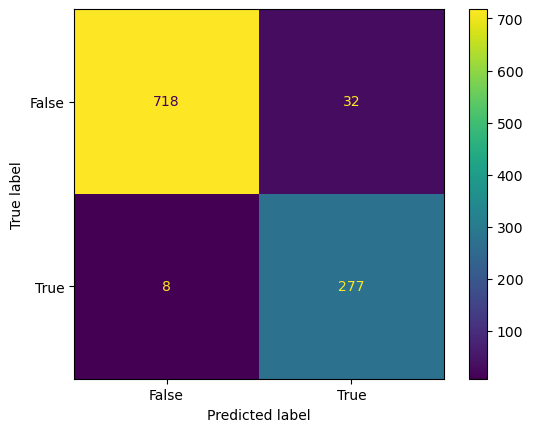

<IPython.core.display.Javascript object>

In [157]:
# Matrice de confusion
confusion_matrix2 = metrics.confusion_matrix(y_test, y_pred2)

cm_display2 = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix2, display_labels=[False, True]
)

cm_display2.plot()